# **<font color=#8e44ad>Walmart Sales Prediction</font>**

Data is from a Kaggle dataset available here: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast?select=features.csv

Credits go to Aslan Ahmedov for arranging data collection and availability. 

The idea behind this dataset is to be able to predict the sales for a given store at a given date. 

## **<font color=#8e44ad>Loading Data</font>**

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

In [178]:
features = pd.read_csv("../group_project/features.csv")
stores = pd.read_csv("../group_project/stores.csv")
df = pd.read_csv("../group_project/train.csv")

In [179]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [180]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [181]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


To do our job we have 3 sources at our disposal:
- df: contains the sales per date at store level. We also get to know if the day was a holiday or not. 
- features: contains extra information such as temperature, unemployment rate and fuel price for a given store at a given date. 
- stores: the size and type of a store.

First, we will concatenate df and features together, using the store id and the date as keys. 

In [182]:
print(f"this is the nb of rows for df: {df.shape[0]}")
print(f"this is the nb of rows for features: {features.shape[0]}")

this is the nb of rows for df: 421570
this is the nb of rows for features: 8190


In [183]:
print(f"- Unique store values for df: {df['Store'].unique()}")
print(f"- Unique store values for features: {df['Store'].unique()}")

- Unique store values for df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
- Unique store values for features: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


Good news is we have the same exact list for both datasets, no store is missing for one or the other. The difference of rows is probably coming from the date column then.

In [184]:
print(f"- Nb of unique date values for df: {df['Date'].nunique()}")
print(f"- Nb of unique date  values for features: {df['Date'].nunique()}")

- Nb of unique date values for df: 143
- Nb of unique date  values for features: 143


In [185]:
print(f" The oldest date for features is: {features['Date'].min()} and the most recent is: {features['Date'].max()}")
print(f" The oldest date for df is: {df['Date'].min()} and the most recent is: {df['Date'].max()}")

 The oldest date for features is: 2010-02-05 and the most recent is: 2013-07-26
 The oldest date for df is: 2010-02-05 and the most recent is: 2012-10-26


As we can see despite having the same nb of unique dates, the date range differs. That means we will loose some information when merging the two dataset together. 

In [186]:
data = pd.merge(df.drop(columns=['IsHoliday']), features, on=['Store', 'Date'])
data.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 45.4+ MB


In [188]:
data.shape

(421570, 14)

Now, we will add some additional information using the stores set.

In [189]:
full_data = pd.merge(data, stores, on=['Store'])
full_data.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [190]:
print(f"This is the number of rows with null values for Markdown1: {full_data['MarkDown1'].isnull().sum()},that represents {np.round(full_data['MarkDown1'].isnull().sum() / full_data.shape[0]*100, 2)}% of the data")
print(f"This is the number of rows with null values for Markdown2: {full_data['MarkDown2'].isnull().sum()},that represents {np.round(full_data['MarkDown2'].isnull().sum() / full_data.shape[0]*100, 2)}% of the data")
print(f"This is the number of rows with null values for Markdown3: {full_data['MarkDown3'].isnull().sum()},that represents {np.round(full_data['MarkDown3'].isnull().sum() / full_data.shape[0]*100, 2)}% of the data")
print(f"This is the number of rows with null values for Markdown4: {full_data['MarkDown4'].isnull().sum()},that represents {np.round(full_data['MarkDown4'].isnull().sum() / full_data.shape[0]*100, 2)}% of the data")
print(f"This is the number of rows with null values for Markdown5: {full_data['MarkDown5'].isnull().sum()},that represents {np.round(full_data['MarkDown5'].isnull().sum() / full_data.shape[0]*100, 2)}% of the data")

This is the number of rows with null values for Markdown1: 270889,that represents 64.26% of the data
This is the number of rows with null values for Markdown2: 310322,that represents 73.61% of the data
This is the number of rows with null values for Markdown3: 284479,that represents 67.48% of the data
This is the number of rows with null values for Markdown4: 286603,that represents 67.98% of the data
This is the number of rows with null values for Markdown5: 270138,that represents 64.08% of the data


As we can see, markdown is empty most of the time. After reading the metas on Kaggle, it seems this column represents the total discount amount ran by the store on that date. 

Therefore, we will cast all of these as 0 instead of 'NaN'.

In [191]:
full_data['MarkDown1'].fillna(value=0, inplace=True)
full_data['MarkDown2'].fillna(value=0, inplace=True)
full_data['MarkDown3'].fillna(value=0, inplace=True)
full_data['MarkDown4'].fillna(value=0, inplace=True)
full_data['MarkDown5'].fillna(value=0, inplace=True)

full_data.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [192]:
data_columns = full_data.columns

for column in data_columns:
    print(f"This is the number of rows with null values for {column}: {full_data[column].isnull().sum()},that represents {np.round(full_data[column].isnull().sum() / full_data.shape[0]*100, 2)}% of the data")

This is the number of rows with null values for Store: 0,that represents 0.0% of the data
This is the number of rows with null values for Dept: 0,that represents 0.0% of the data
This is the number of rows with null values for Date: 0,that represents 0.0% of the data
This is the number of rows with null values for Weekly_Sales: 0,that represents 0.0% of the data
This is the number of rows with null values for Temperature: 0,that represents 0.0% of the data
This is the number of rows with null values for Fuel_Price: 0,that represents 0.0% of the data
This is the number of rows with null values for MarkDown1: 0,that represents 0.0% of the data
This is the number of rows with null values for MarkDown2: 0,that represents 0.0% of the data
This is the number of rows with null values for MarkDown3: 0,that represents 0.0% of the data
This is the number of rows with null values for MarkDown4: 0,that represents 0.0% of the data
This is the number of rows with null values for MarkDown5: 0,that re

Ok, data is now clean and we can move to data exploration and preprocessing. 

## **<font color=#8e44ad>EDA</font>**

In [193]:
full_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')

Plot ideas:
- Weekly sales vs type of day (is it holiday or not) --> some holidays should have a big impact on sales
- Weekly sales by month
- Weekly sales vs size of store --> the bigger, the bigger sales should be
- Weekly sales vs Fuel Price 
- Weekly sales vs unemployment rate

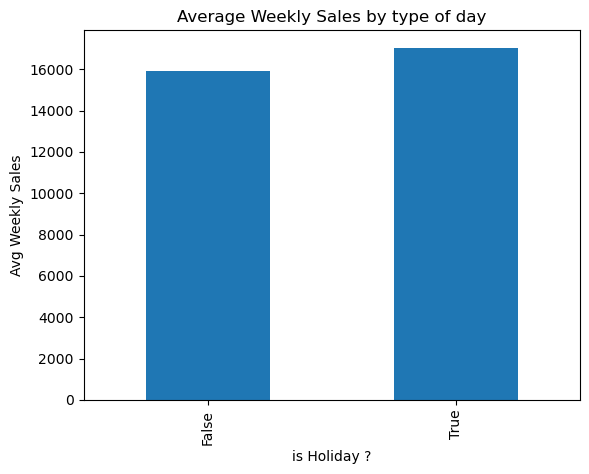

In [194]:
mean_sales_by_day_type = full_data.groupby('IsHoliday')['Weekly_Sales'].mean()

# Sorting data in descending order
mean_sales_by_day_type = mean_sales_by_day_type.sort_values(ascending=True)

# Plot the Air Quality by Region
mean_sales_by_day_type.plot(kind='bar')
plt.xlabel('is Holiday ?')
plt.ylabel('Avg Weekly Sales')
plt.title('Average Weekly Sales by type of day')
plt.show()

Sales are a bit higher on average over holidays but the difference is not that big. Let's try to plot the same information but at month level.

In [195]:
full_data['Month'] = pd.DatetimeIndex(full_data['Date']).month
full_data.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Month
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2


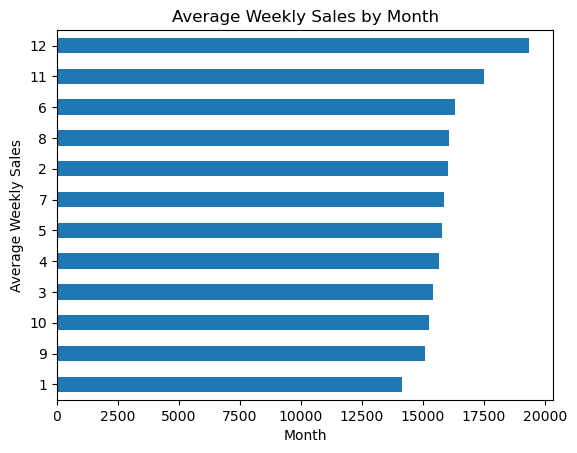

In [196]:
mean_sales_by_month = full_data.groupby('Month')['Weekly_Sales'].mean()
mean_sales_by_month = mean_sales_by_month.sort_values(ascending=True)

mean_sales_by_month.plot(kind='barh')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month')
plt.show()

At month level the information is clearer: as expected, end of the year represents a peak of sales for Walmart stores. Also, we can notice that June, which is 3rd in terms of sales, marks the start of Summer. Sales might be correlated to the season rather than an exact date.  

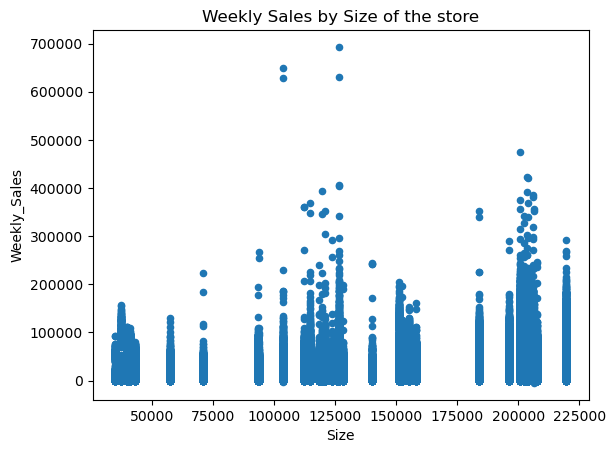

In [197]:
full_data.plot(x='Size', y='Weekly_Sales', kind='scatter')
plt.title('Weekly Sales by Size of the store')
plt.show()

We can see a slight correlation between the size and the sales, but the difference is not that obvious between "mid-size" abd very big stores. Some smaller stores are even performing better than the big ones. 

That means we are probably lacking some information: stores perform also based on their exact location. 

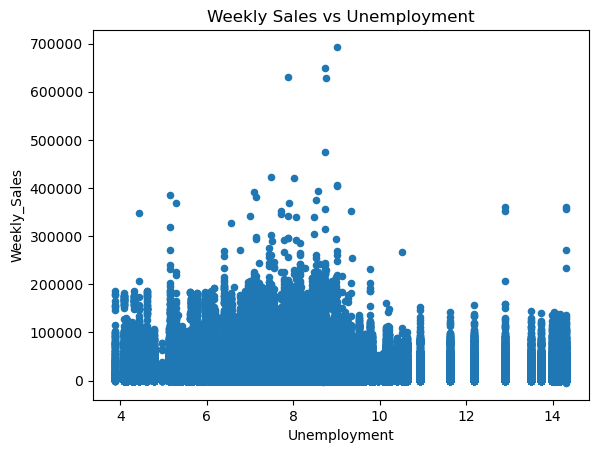

In [198]:
full_data.plot(x='Unemployment', y='Weekly_Sales', kind='scatter')
plt.title('Weekly Sales vs Unemployment')
plt.show()

Unemployment rate does not seem to have a massive impact ona store's performance.

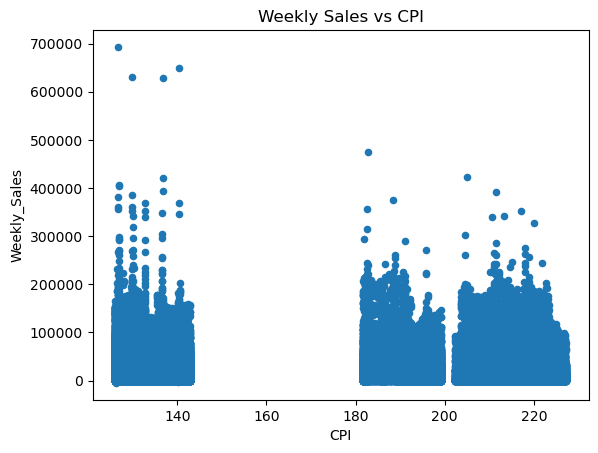

In [199]:
full_data.plot(x='CPI', y='Weekly_Sales', kind='scatter')
plt.title('Weekly Sales vs CPI')
plt.show()

The Consumer Price Index (CPI) measures the monthly change in prices paid by US customers. It helps to represent inflation and deflation. It is measured in points and not percentage. 

Here it seems it is not the CPI value itself that has an impact but probably the difference from one month to another. 

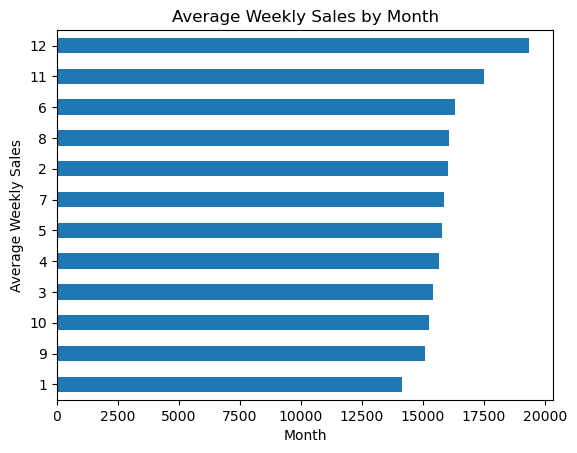

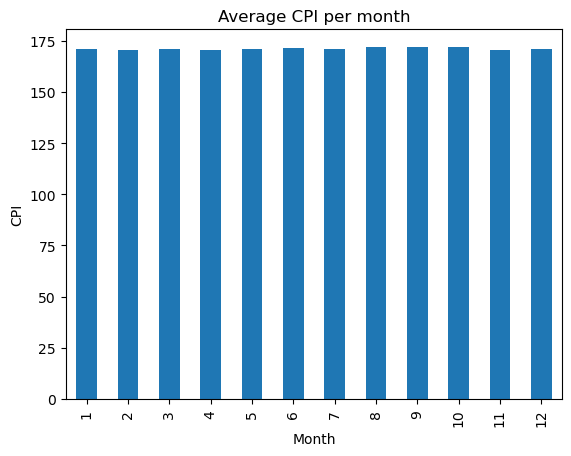

In [200]:
mean_sales_by_month = full_data.groupby('Month')['Weekly_Sales'].mean()
mean_sales_by_month = mean_sales_by_month.sort_values(ascending=True)

mean_sales_by_month.plot(kind='barh')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month')
plt.show()

mean_cpi_by_month = full_data.groupby('Month')['CPI'].mean()

mean_cpi_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('CPI')
plt.title('Average CPI per month')
plt.show()

On average CPI doesn't seem to change a lot on the period we were given. It is doubtful there is a linear correlation with sales then.

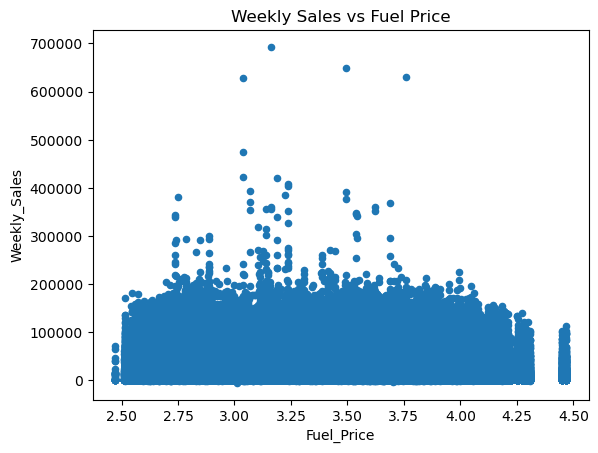

In [201]:
full_data.plot(x='Fuel_Price', y='Weekly_Sales', kind='scatter')
plt.title('Weekly Sales vs Fuel Price')
plt.show()

Again, no obvious linear correlation. This can be explained as it is not the price of fuel for a given store but an average cost for the region of the store. 

Here, it would have been more interesting to have the price at store level than store's region. 

We will know try to plot the correlation matrix of our dataset. For this we will: 
- split the date columns in 3 distinct columns (year, month, day)
- encode the type of store (we will go with one-hot encoding as we don't know what A, B and C means)

In [202]:
full_data['Year'] = pd.DatetimeIndex(full_data['Date']).year
full_data['Day'] = pd.DatetimeIndex(full_data['Date']).day

In [203]:
encoded_data = pd.get_dummies(full_data, columns=['Type'])

In [204]:
encoded_data.head(3)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,IsHoliday,Size,Month,Year,Day,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,...,211.096358,8.106,False,151315,2,2010,5,1,0,0
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,...,211.096358,8.106,False,151315,2,2010,5,1,0,0
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,...,211.096358,8.106,False,151315,2,2010,5,1,0,0


In [205]:
encoded_data.drop(columns=['Date'], inplace=True)

In [206]:
encoded_data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Size', 'Month', 'Year', 'Day', 'Type_A',
       'Type_B', 'Type_C'],
      dtype='object')

In [207]:
# reorganizing data to have weekly sales as last column for an easier reading of the correlation matrix to follow
encoded_data = encoded_data.reindex(columns=['Store', 'Dept', 'Month', 'Year', 'Day', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Size', 'Type_A',
       'Type_B', 'Type_C', 'Weekly_Sales'])
encoded_data.head(3)

,Store,Dept,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type_A,Type_B,Type_C,Weekly_Sales
0,1,1,2,2010,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,1,0,0,24924.50
1,1,2,2,2010,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,1,0,0,50605.27
2,1,3,2,2010,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,1,0,0,13740.12


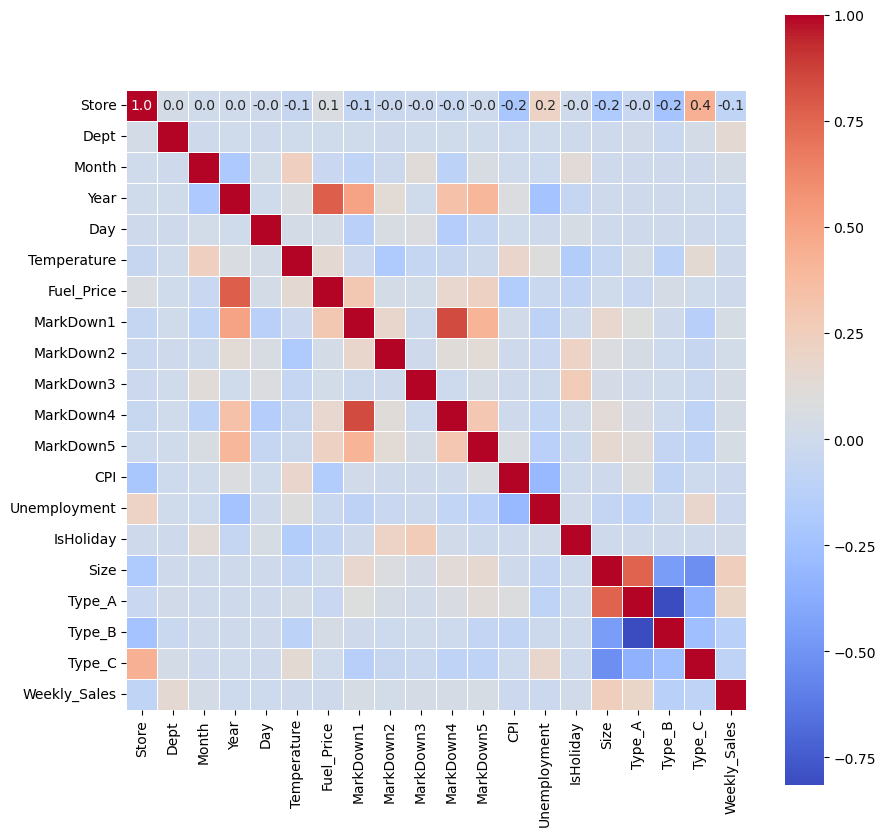

In [208]:
corr_matrix = encoded_data.corr()

# Plotting the matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".1f", linewidth=.5, annot_kws={"fontsize": 10, "rotation": 0})
plt.show()

From this, we could assume that there is no linear correlation between weekly sales and the following columns:
- CPI
- isHolidays
- Date
- Unemployment
- Temperature
- Markdowns in general

## **<font color=#8e44ad>Building the model</font>**

We will first try to compute a model using all features and then proceed to some feature selection. 

In [209]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_data.drop(columns=['Store', 'Weekly_Sales', 'Date']), full_data['Weekly_Sales'])

In [210]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [211]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state=42)

# fiting the model
model.fit(X_train_encoded, y_train)

# Predictions
y_pred_train = model.predict(X_train_encoded)
y_pred_val = model.predict(X_test_encoded)

In [212]:
model.score(X_train_encoded, y_train)

0.061241500684957484

In [213]:
model.score(X_test_encoded, y_test)

0.061535131402604026

### **<font color=#8e44ad>Feature Selection and Engineering</font>**

In [214]:
def create_time_feature(df):
    df['dayofmonth'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['weekofyear'] = df['Date'].dt.isocalendar().week
    return df

In [215]:
full_data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Month,Year,Day
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,2010,5
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,2010,5
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,2010,5
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,2010,5
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,2010,5


In [216]:
full_data['Date'] = pd.to_datetime(full_data["Date"])
df = create_time_feature(full_data)
df.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month,Year,Day,dayofmonth,dayofweek,quarter,month,year,dayofyear,weekofyear
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,...,2,2010,5,5,4,1,2,2010,36,5
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,...,2,2010,5,5,4,1,2,2010,36,5
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,...,2,2010,5,5,4,1,2,2010,36,5
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,...,2,2010,5,5,4,1,2,2010,36,5
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,...,2,2010,5,5,4,1,2,2010,36,5


In [217]:
df.drop(columns=['Month', 'Year', 'Day'], inplace=True)

In [218]:
df.sort_values(by=['Store', 'Date'], ascending=True, inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,IsHoliday,Type,Size,dayofmonth,dayofweek,quarter,month,year,dayofyear,weekofyear
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,...,False,A,151315,5,4,1,2,2010,36,5
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,...,False,A,151315,5,4,1,2,2010,36,5
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,...,False,A,151315,5,4,1,2,2010,36,5
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,...,False,A,151315,5,4,1,2,2010,36,5
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,...,False,A,151315,5,4,1,2,2010,36,5


In [219]:
def cpi_difference(df):
    differences = []

    for rows in range(1, len(df)):
        value_0 = float(df['CPI'].iloc[rows - 1])
        value_1 = float(df['CPI'].iloc[rows])
        result = value_1 - value_0
        differences.append(result)
    
    df['CPI_Difference'] = [0] + differences
    return df


In [220]:
final_data = cpi_difference(full_data)
final_data.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Type,Size,dayofmonth,dayofweek,quarter,month,year,dayofyear,weekofyear,CPI_Difference
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,5,4,1,2,2010,36,5,0.0
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,5,4,1,2,2010,36,5,0.0
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,5,4,1,2,2010,36,5,0.0
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,5,4,1,2,2010,36,5,0.0
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,5,4,1,2,2010,36,5,0.0


In [221]:
final_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'dayofmonth', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'weekofyear',
       'CPI_Difference'],
      dtype='object')

In [222]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=['Store','Weekly_Sales', 'Date', 'Fuel_Price', 'CPI', 'Unemployment']), final_data['Weekly_Sales'])

In [223]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [224]:
model = ElasticNet(random_state=42)

# fiting the model
model.fit(X_train_encoded, y_train)

# Predictions
y_pred_train = model.predict(X_train_encoded)
y_pred_val = model.predict(X_test_encoded)

In [225]:
print(f"This is the score for the train: {model.score(X_train_encoded, y_train)}")
print(f"This is the score for the test: {model.score(X_test_encoded, y_test)}")

This is the score for the train: 0.06128098261350967
This is the score for the test: 0.06265433219728678


In [226]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=10, random_state=0)

model.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [227]:
y_pred_train_RF = model.predict(X_train_encoded)
y_pred_test_RF = model.predict(X_test_encoded)

print(f"This is the score for the train: {model.score(X_train_encoded, y_train)}")
print(f"This is the score for the test: {model.score(X_test_encoded, y_test)}")

This is the score for the train: 0.670751280580328
This is the score for the test: 0.6619195502297175
